In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('sampla_data_08_05_2022(final).xlsx')

In [4]:
df.head()

,Patient_ID,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,...,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Mode_Of_Transport,Reached_On_Time
0,1,34,Male,Acute kidney profile,Blood,Advanced,2022-02-15,12.40,2022-02-16,13.00,...,17.00,5,Low Traffic,7.0,14,10,13.0,26,BIKE,Y
1,3,25,Male,HbA1c,Blood,Normal,2022-02-17,11.12,2022-02-17,14.13,...,17.13,3,Low Traffic,12.0,24,10,6.0,12,BIKE,Y
2,4,29,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-02-17,12.24,2022-02-17,16.10,...,19.10,4,Medium Traffic,2.0,6,3,3.0,9,BIKE,Y
3,5,28,Male,TSH,Blood,Normal,2022-02-17,13.38,2022-02-18,14.00,...,17.00,5,Low Traffic,5.0,10,10,5.0,10,BIKE,Y
4,6,32,Male,Lipid Profile,Blood,Normal,2022-02-17,16.10,2022-02-18,10.15,...,13.15,4,High Traffic,12.0,72,3,9.0,54,BIKE,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Patient_ID                              1019 non-null   int64         
 1   Patient_Age                             1019 non-null   int64         
 2   Patient_Gender                          1019 non-null   object        
 3   Test_Name                               1019 non-null   object        
 4   Sample                                  1019 non-null   object        
 5   Way_Of_Storage_Of_Sample                1019 non-null   object        
 6   Test_Booking_Date                       1019 non-null   datetime64[ns]
 7   Test_Booking_Time_HH_MM                 1019 non-null   float64       
 8   Sample_Collection_Date                  1019 non-null   datetime64[ns]
 9   Scheduled_Sample_Collection_Time_HH_MM  1019 non-nul

### ***Data Preprocessing

In [6]:
df.isna().any()

Patient_ID                                False
Patient_Age                               False
Patient_Gender                            False
Test_Name                                 False
Sample                                    False
Way_Of_Storage_Of_Sample                  False
Test_Booking_Date                         False
Test_Booking_Time_HH_MM                   False
Sample_Collection_Date                    False
Scheduled_Sample_Collection_Time_HH_MM    False
Cut-off Schedule                          False
Cut-off time_HH_MM                        False
Agent_ID                                  False
Traffic_Conditions                        False
Agent_Location_KM                         False
Time_Taken_To_Reach_Patient_MM            False
Time_For_Sample_Collection_MM             False
Lab_Location_KM                           False
Time_Taken_To_Reach_Lab_MM                False
Mode_Of_Transport                         False
Reached_On_Time                         

In [7]:
df.duplicated().any()

False

##### **Unique Values

In [8]:
for col in df.columns[:]:
    print(col, ' : ', len(df[col].unique()), 'Unique Values')

Patient_ID  :  1019 Unique Values
Patient_Age  :  75 Unique Values
Patient_Gender  :  2 Unique Values
Test_Name  :  10 Unique Values
Sample  :  4 Unique Values
Way_Of_Storage_Of_Sample  :  2 Unique Values
Test_Booking_Date  :  176 Unique Values
Test_Booking_Time_HH_MM  :  176 Unique Values
Sample_Collection_Date  :  166 Unique Values
Scheduled_Sample_Collection_Time_HH_MM  :  91 Unique Values
Cut-off Schedule  :  2 Unique Values
Cut-off time_HH_MM  :  77 Unique Values
Agent_ID  :  49 Unique Values
Traffic_Conditions  :  3 Unique Values
Agent_Location_KM  :  52 Unique Values
Time_Taken_To_Reach_Patient_MM  :  89 Unique Values
Time_For_Sample_Collection_MM  :  27 Unique Values
Lab_Location_KM  :  119 Unique Values
Time_Taken_To_Reach_Lab_MM  :  145 Unique Values
Mode_Of_Transport  :  1 Unique Values
Reached_On_Time  :  2 Unique Values


In [9]:
df.shape, df.columns

((1019, 21),
 Index(['Patient_ID', 'Patient_Age', 'Patient_Gender', 'Test_Name', 'Sample',
        'Way_Of_Storage_Of_Sample', 'Test_Booking_Date',
        'Test_Booking_Time_HH_MM', 'Sample_Collection_Date',
        'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off Schedule',
        'Cut-off time_HH_MM', 'Agent_ID', 'Traffic_Conditions',
        'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
        'Time_For_Sample_Collection_MM', 'Lab_Location_KM',
        'Time_Taken_To_Reach_Lab_MM', 'Mode_Of_Transport', 'Reached_On_Time'],
       dtype='object'))

#### **Separating the numerical columns from given dataset

In [10]:
numerical_columns = df[['Patient_Age', 'Test_Booking_Time_HH_MM', 'Scheduled_Sample_Collection_Time_HH_MM',
                       'Cut-off time_HH_MM', 'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
                        'Time_For_Sample_Collection_MM', 'Lab_Location_KM', 'Time_Taken_To_Reach_Lab_MM']]

##### **Cheaking for outliers

<AxesSubplot:xlabel='Patient_Age'>

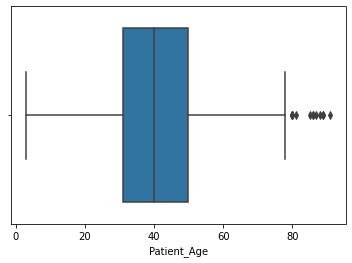

In [11]:
sns.boxplot(numerical_columns['Patient_Age'])

<AxesSubplot:xlabel='Test_Booking_Time_HH_MM'>

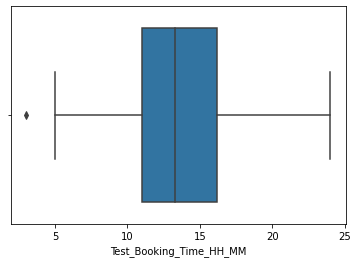

In [12]:
sns.boxplot(numerical_columns['Test_Booking_Time_HH_MM'])

<AxesSubplot:xlabel='Scheduled_Sample_Collection_Time_HH_MM'>

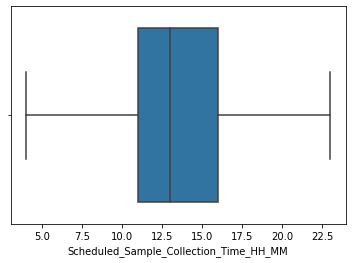

In [13]:
sns.boxplot(numerical_columns['Scheduled_Sample_Collection_Time_HH_MM'])

<AxesSubplot:xlabel='Cut-off time_HH_MM'>

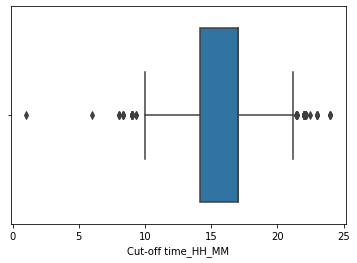

In [14]:
sns.boxplot(numerical_columns['Cut-off time_HH_MM'])

<AxesSubplot:xlabel='Agent_Location_KM'>

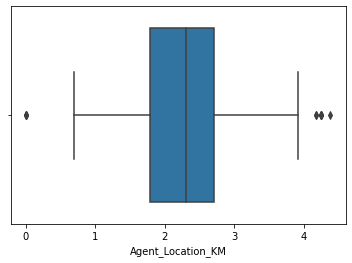

In [15]:
sns.boxplot(np.log(numerical_columns['Agent_Location_KM']))

In [16]:
np.log(numerical_columns['Agent_Location_KM']).isna().any()

False

<AxesSubplot:xlabel='Time_Taken_To_Reach_Patient_MM'>

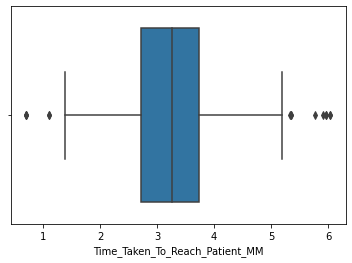

In [17]:
sns.boxplot(np.log(numerical_columns['Time_Taken_To_Reach_Patient_MM']))

In [18]:
np.log(numerical_columns['Time_Taken_To_Reach_Patient_MM']).isna().any()

False

<AxesSubplot:xlabel='Time_For_Sample_Collection_MM'>

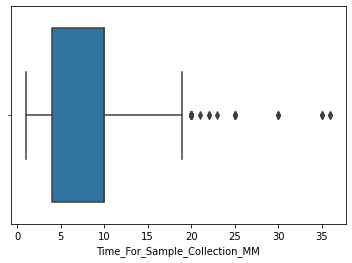

In [19]:
sns.boxplot(numerical_columns['Time_For_Sample_Collection_MM'])

In [20]:
np.log(numerical_columns['Lab_Location_KM']).isna().any()

False

<AxesSubplot:xlabel='Lab_Location_KM'>

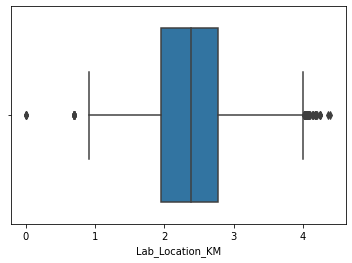

In [21]:
sns.boxplot(np.log(numerical_columns['Lab_Location_KM']))

<AxesSubplot:xlabel='Time_Taken_To_Reach_Lab_MM'>

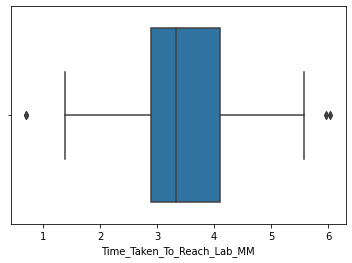

In [22]:
sns.boxplot(np.log(numerical_columns['Time_Taken_To_Reach_Lab_MM']))

In [23]:
np.log(numerical_columns['Time_Taken_To_Reach_Lab_MM']).isna().any()

False

#### **Using Transformations for getting bell shaped curved

In [24]:
numerical_columns['Agent_Location_KM'] = np.log(numerical_columns['Agent_Location_KM'])
numerical_columns['Time_Taken_To_Reach_Patient_MM'] = np.log(numerical_columns['Time_Taken_To_Reach_Patient_MM'])
numerical_columns['Lab_Location_KM'] = np.log(numerical_columns['Lab_Location_KM'])
numerical_columns['Time_Taken_To_Reach_Lab_MM'] = np.log(numerical_columns['Time_Taken_To_Reach_Lab_MM'])

### Outliers Treatment

In [25]:
from feature_engine.outliers import Winsorizer

In [26]:
w = Winsorizer(capping_method='iqr', fold = 1.5, tail = 'both', 
              variables=['Patient_Age', 'Test_Booking_Time_HH_MM', 'Scheduled_Sample_Collection_Time_HH_MM',
                       'Cut-off time_HH_MM', 'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
                        'Time_For_Sample_Collection_MM', 'Lab_Location_KM', 'Time_Taken_To_Reach_Lab_MM'])

df_winsor = w.fit_transform(numerical_columns[['Patient_Age', 'Test_Booking_Time_HH_MM', 'Scheduled_Sample_Collection_Time_HH_MM',
                       'Cut-off time_HH_MM', 'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
                        'Time_For_Sample_Collection_MM', 'Lab_Location_KM', 'Time_Taken_To_Reach_Lab_MM']])

In [27]:
df_winsor.describe()

,Patient_Age,Test_Booking_Time_HH_MM,Scheduled_Sample_Collection_Time_HH_MM,Cut-off time_HH_MM,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,41.456820,13.786634,13.281178,16.207144,2.206447,3.241530,8.588813,2.406768,3.521687
std,14.015799,3.641620,3.272607,2.827143,0.637812,0.749952,4.642284,0.726250,0.941294
min,3.000000,3.200000,4.000000,9.875000,0.417323,1.181694,1.000000,0.705892,1.084413
25%,31.000000,11.000000,11.000000,14.150000,1.791759,2.708050,4.000000,1.945910,2.890372
50%,40.000000,13.300000,13.000000,17.000000,2.302585,3.258097,10.000000,2.379546,3.332205
75%,50.000000,16.200000,16.000000,17.000000,2.708050,3.725621,10.000000,2.772589,4.094345
max,78.500000,24.000000,23.000000,21.275000,4.082486,5.251977,19.000000,4.012607,5.900304


#### **Separating the catagorical columns from given dataset

In [28]:
catagorical_columns = df[['Patient_Gender', 'Test_Name', 'Sample', 'Way_Of_Storage_Of_Sample',
                          'Cut-off Schedule', 'Traffic_Conditions', 'Reached_On_Time']]

#### **Analysis for catagorical coloumns

<AxesSubplot:xlabel='Patient_Gender', ylabel='count'>

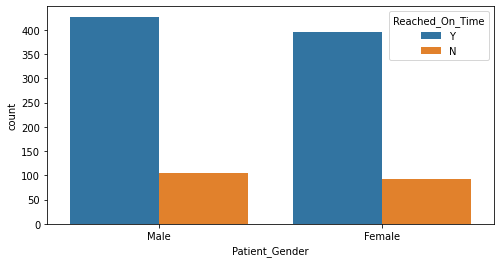

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(data = catagorical_columns, x = 'Patient_Gender', hue = 'Reached_On_Time')

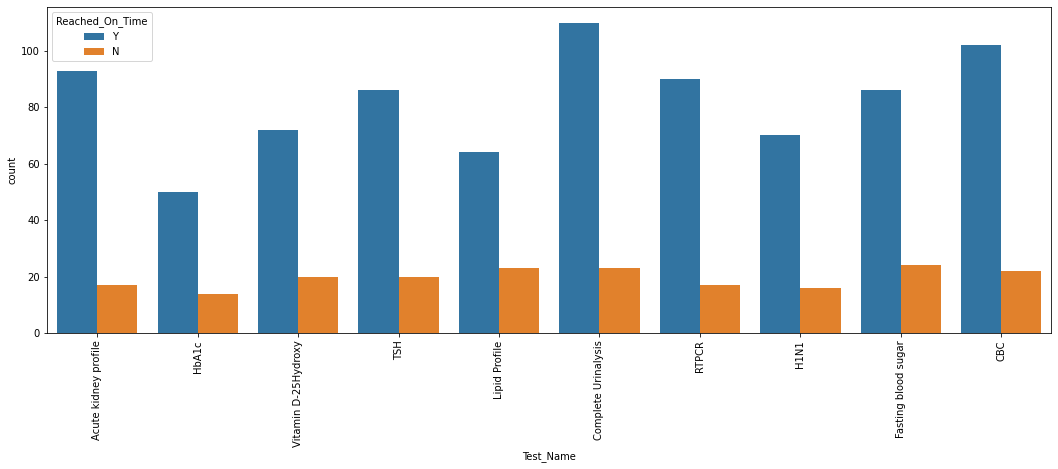

In [30]:
plt.figure(figsize=(18, 6))
sns.countplot(data = catagorical_columns, x = 'Test_Name', hue = 'Reached_On_Time')
plt.xticks(rotation = 90)
plt.show()

In [31]:
catagorical_columns['Sample'] = np.where(catagorical_columns['Sample'] == 'blood', 'Blood',
                                         catagorical_columns['Sample'])

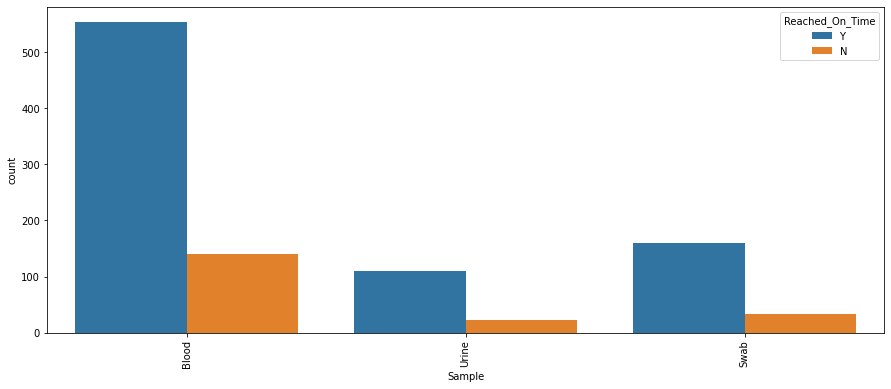

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(data = catagorical_columns, x = 'Sample', hue = 'Reached_On_Time')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Way_Of_Storage_Of_Sample', ylabel='count'>

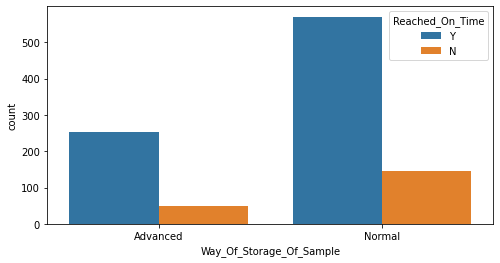

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(data = catagorical_columns, x = 'Way_Of_Storage_Of_Sample', hue = 'Reached_On_Time')

<AxesSubplot:xlabel='Cut-off Schedule', ylabel='count'>

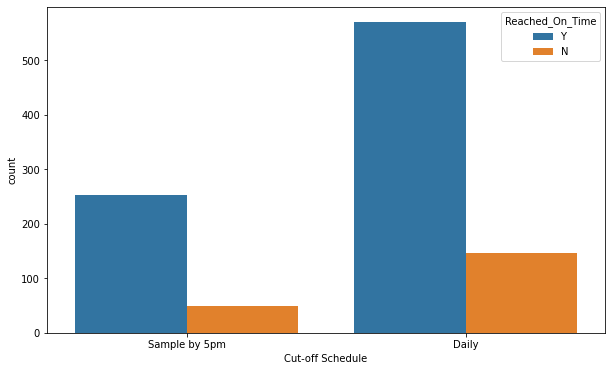

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data = catagorical_columns, x = 'Cut-off Schedule', hue = 'Reached_On_Time')

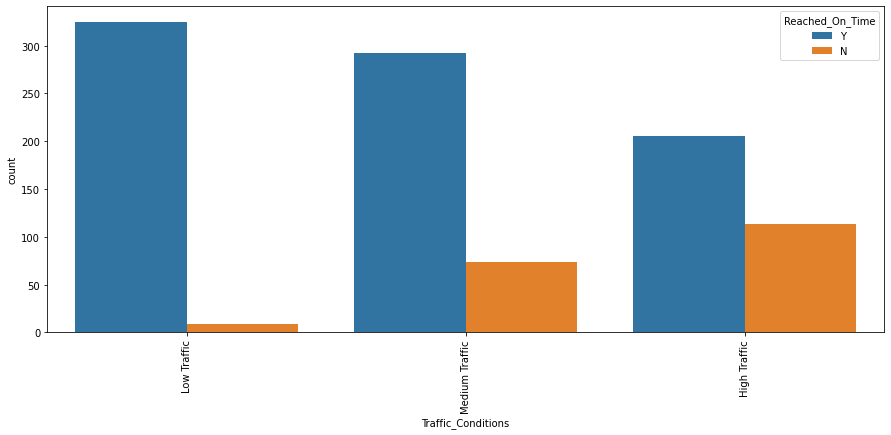

In [35]:
plt.figure(figsize=(15, 6))
sns.countplot(data = catagorical_columns, x = 'Traffic_Conditions', hue = 'Reached_On_Time')
plt.xticks(rotation = 90)
plt.show()

#### **Combining numerical and catagorical columns respectively !!

In [36]:
final = pd.concat([df_winsor, catagorical_columns], axis = 1)

In [37]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Age                             1019 non-null   float64
 1   Test_Booking_Time_HH_MM                 1019 non-null   float64
 2   Scheduled_Sample_Collection_Time_HH_MM  1019 non-null   float64
 3   Cut-off time_HH_MM                      1019 non-null   float64
 4   Agent_Location_KM                       1019 non-null   float64
 5   Time_Taken_To_Reach_Patient_MM          1019 non-null   float64
 6   Time_For_Sample_Collection_MM           1019 non-null   float64
 7   Lab_Location_KM                         1019 non-null   float64
 8   Time_Taken_To_Reach_Lab_MM              1019 non-null   float64
 9   Patient_Gender                          1019 non-null   object 
 10  Test_Name                               1019 non-null   obje

### Descriptive Analysis

In [38]:
final.describe()

,Patient_Age,Test_Booking_Time_HH_MM,Scheduled_Sample_Collection_Time_HH_MM,Cut-off time_HH_MM,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,41.456820,13.786634,13.281178,16.207144,2.206447,3.241530,8.588813,2.406768,3.521687
std,14.015799,3.641620,3.272607,2.827143,0.637812,0.749952,4.642284,0.726250,0.941294
min,3.000000,3.200000,4.000000,9.875000,0.417323,1.181694,1.000000,0.705892,1.084413
25%,31.000000,11.000000,11.000000,14.150000,1.791759,2.708050,4.000000,1.945910,2.890372
50%,40.000000,13.300000,13.000000,17.000000,2.302585,3.258097,10.000000,2.379546,3.332205
75%,50.000000,16.200000,16.000000,17.000000,2.708050,3.725621,10.000000,2.772589,4.094345
max,78.500000,24.000000,23.000000,21.275000,4.082486,5.251977,19.000000,4.012607,5.900304


## Exploratory Data Analysis

#### **Univariate

<AxesSubplot:xlabel='Patient_Age', ylabel='Density'>

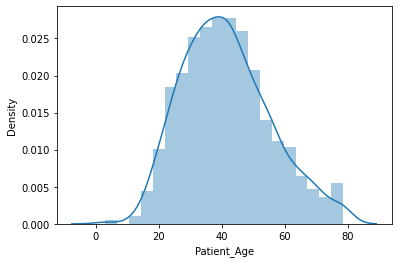

In [39]:
sns.distplot(final['Patient_Age'])

<AxesSubplot:xlabel='Test_Booking_Time_HH_MM', ylabel='Density'>

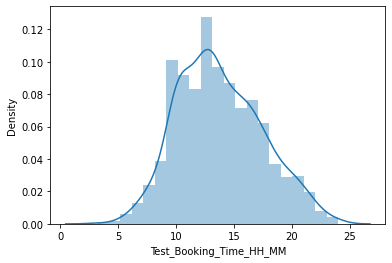

In [40]:
sns.distplot(final['Test_Booking_Time_HH_MM'])

<AxesSubplot:xlabel='Cut-off time_HH_MM', ylabel='Density'>

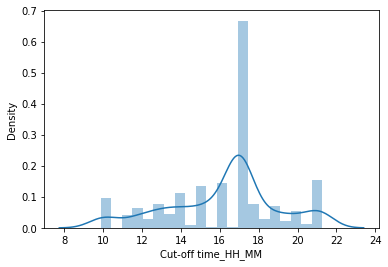

In [41]:
sns.distplot(final['Cut-off time_HH_MM'])

<AxesSubplot:xlabel='Agent_Location_KM', ylabel='Density'>

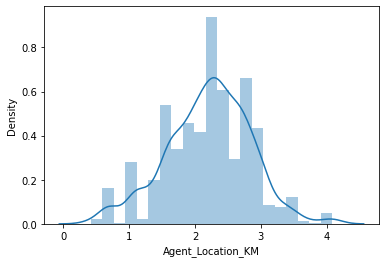

In [42]:
sns.distplot(final['Agent_Location_KM'])

<AxesSubplot:xlabel='Time_Taken_To_Reach_Patient_MM', ylabel='Density'>

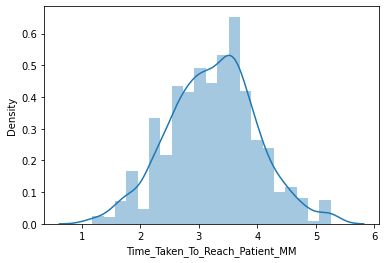

In [43]:
sns.distplot(final['Time_Taken_To_Reach_Patient_MM'])

<AxesSubplot:xlabel='Time_For_Sample_Collection_MM', ylabel='Density'>

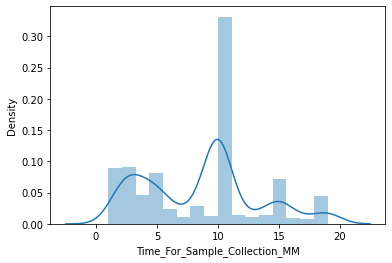

In [44]:
sns.distplot(final['Time_For_Sample_Collection_MM'])

<AxesSubplot:xlabel='Lab_Location_KM', ylabel='Density'>

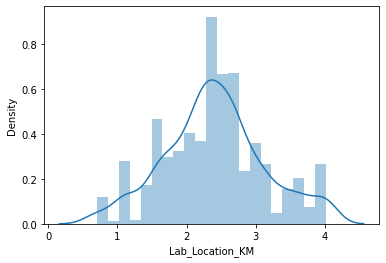

In [45]:
sns.distplot(final['Lab_Location_KM'])

<AxesSubplot:xlabel='Time_Taken_To_Reach_Lab_MM', ylabel='Density'>

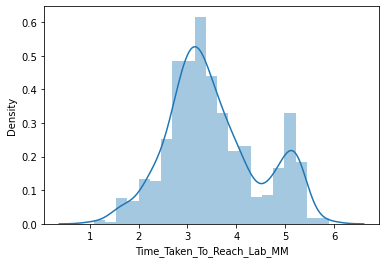

In [46]:
sns.distplot(final['Time_Taken_To_Reach_Lab_MM'])

## ***Cheaking for correletion

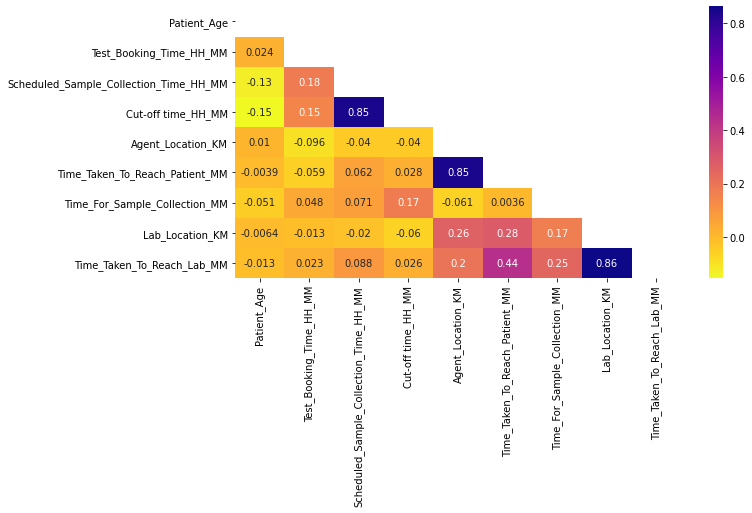

In [47]:
plt.figure(figsize=(10,5))
a = final.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
sns.heatmap(a, mask = mask, annot=True, cmap='plasma_r');

In [48]:
final.columns

Index(['Patient_Age', 'Test_Booking_Time_HH_MM',
       'Scheduled_Sample_Collection_Time_HH_MM', 'Cut-off time_HH_MM',
       'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM',
       'Time_For_Sample_Collection_MM', 'Lab_Location_KM',
       'Time_Taken_To_Reach_Lab_MM', 'Patient_Gender', 'Test_Name', 'Sample',
       'Way_Of_Storage_Of_Sample', 'Cut-off Schedule', 'Traffic_Conditions',
       'Reached_On_Time'],
      dtype='object')

#### **Bivariate & Multivariate

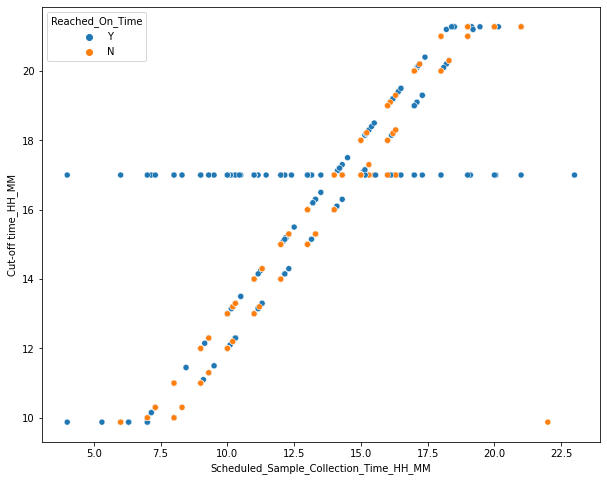

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = final, x = 'Scheduled_Sample_Collection_Time_HH_MM', y = 'Cut-off time_HH_MM', hue = 'Reached_On_Time')
plt.show()

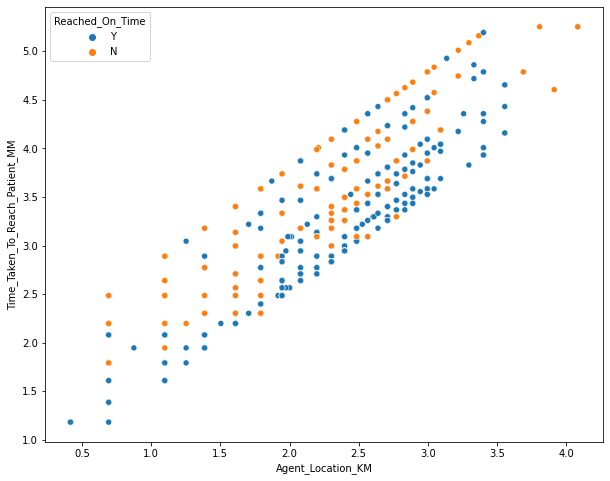

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = final, x = 'Agent_Location_KM', y = 'Time_Taken_To_Reach_Patient_MM', hue = 'Reached_On_Time')
plt.show()

<Figure size 720x576 with 0 Axes>

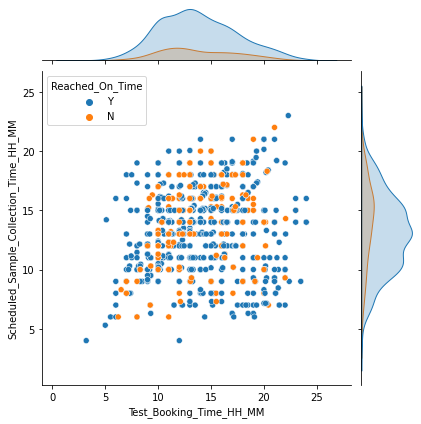

In [51]:
plt.figure(figsize=(10, 8))
sns.jointplot(data = final, x = 'Test_Booking_Time_HH_MM', y = 'Scheduled_Sample_Collection_Time_HH_MM', hue = 'Reached_On_Time')
plt.show()

<Figure size 720x576 with 0 Axes>

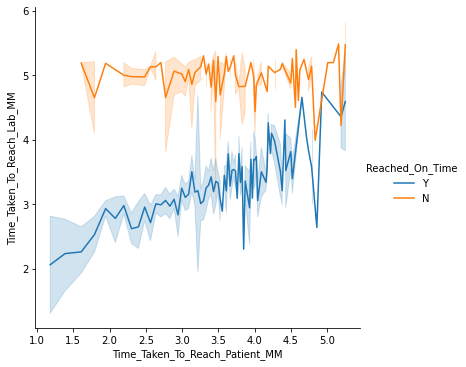

In [52]:
plt.figure(figsize=(10, 8))
sns.relplot(data = final, x = 'Time_Taken_To_Reach_Patient_MM', y = 'Time_Taken_To_Reach_Lab_MM',
            hue = 'Reached_On_Time', kind='line', markers = 'Way_Of_Storage_Of_Sample')
plt.show()

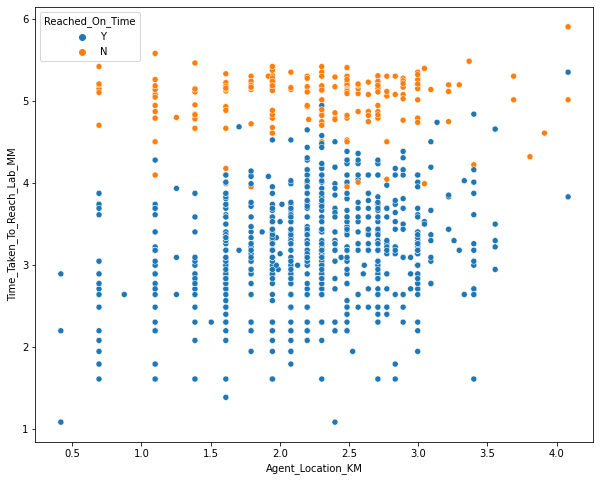

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = final, x = 'Agent_Location_KM', y = 'Time_Taken_To_Reach_Lab_MM',
            hue = 'Reached_On_Time')
plt.show()

In [54]:
final.drop(['Test_Booking_Time_HH_MM', 'Scheduled_Sample_Collection_Time_HH_MM',
            'Agent_Location_KM', 'Time_Taken_To_Reach_Patient_MM'], axis = 1, inplace = True)

In [55]:
final

,Patient_Age,Cut-off time_HH_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Cut-off Schedule,Traffic_Conditions,Reached_On_Time
0,34.0,17.00,10.0,2.564949,3.258097,Male,Acute kidney profile,Blood,Advanced,Sample by 5pm,Low Traffic,Y
1,25.0,17.13,10.0,1.791759,2.484907,Male,HbA1c,Blood,Normal,Daily,Low Traffic,Y
2,29.0,19.10,3.0,1.098612,2.197225,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,Y
3,28.0,17.00,10.0,1.609438,2.302585,Male,TSH,Blood,Normal,Daily,Low Traffic,Y
4,32.0,13.15,3.0,2.197225,3.988984,Male,Lipid Profile,Blood,Normal,Daily,High Traffic,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30.0,15.00,3.0,3.660994,5.273000,Male,Vitamin D-25Hydroxy,Blood,Normal,Daily,High Traffic,N
1015,18.0,12.00,9.0,3.566712,5.176150,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,High Traffic,N
1016,18.0,16.00,11.0,4.012607,5.181784,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,N
1017,37.0,19.00,10.0,4.012607,5.153292,Male,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,N


In [56]:
final.rename(columns = {'Cut-off time_HH_MM' : 'Cut_off_time_HH_MM',
                       'Cut-off Schedule' : 'Cut_off_Schedule'}, inplace = True)

#### **Applying oversampling technique 

In [57]:
from imblearn.over_sampling import SMOTENC

In [58]:
X = final.drop(['Reached_On_Time'], axis = 1)
y = final[['Reached_On_Time']]

In [59]:
smote_nc = SMOTENC(categorical_features=[5, 6, 7, 8, 9, 10], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [60]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Age                    1646 non-null   float64
 1   Cut_off_time_HH_MM             1646 non-null   float64
 2   Time_For_Sample_Collection_MM  1646 non-null   float64
 3   Lab_Location_KM                1646 non-null   float64
 4   Time_Taken_To_Reach_Lab_MM     1646 non-null   float64
 5   Patient_Gender                 1646 non-null   object 
 6   Test_Name                      1646 non-null   object 
 7   Sample                         1646 non-null   object 
 8   Way_Of_Storage_Of_Sample       1646 non-null   object 
 9   Cut_off_Schedule               1646 non-null   object 
 10  Traffic_Conditions             1646 non-null   object 
dtypes: float64(5), object(6)
memory usage: 141.6+ KB


(array([0, 1]), [Text(0, 0, '(N,)'), Text(1, 0, '(Y,)')])

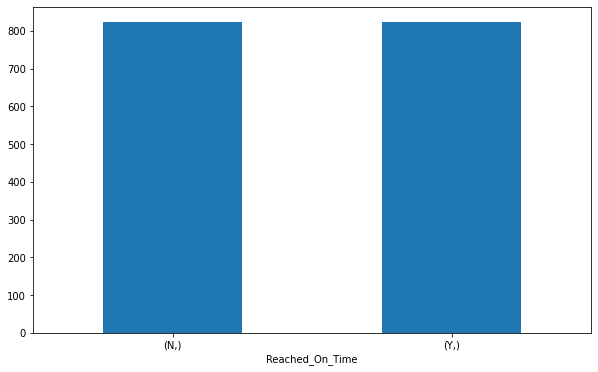

In [61]:
plt.figure(figsize=(10, 6))
y_resampled.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

### ***Importing Modules for ML

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [63]:
#### **Train Test Split

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [90]:
xtrain.shape, xtest.shape

((1152, 11), (494, 11))

In [66]:
## Gaussian Model

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = GaussianNB()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9150

 Confision Matrix: 
 [[213  22]
 [ 20 239]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.91      0.91      0.91       235
           Y       0.92      0.92      0.92       259

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [68]:
## KNN

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = KNeighborsClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9008

 Confision Matrix: 
 [[219  16]
 [ 33 226]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.87      0.93      0.90       235
           Y       0.93      0.87      0.90       259

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [70]:
## Decision Tree

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = DecisionTreeClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9717

 Confision Matrix: 
 [[227   8]
 [  6 253]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.97      0.97      0.97       235
           Y       0.97      0.98      0.97       259

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [72]:
## AdaBoost

In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = AdaBoostClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9636

 Confision Matrix: 
 [[227   8]
 [ 10 249]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.96      0.97      0.96       235
           Y       0.97      0.96      0.97       259

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



In [74]:
## Gradient Boost

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = GradientBoostingClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9656

 Confision Matrix: 
 [[225  10]
 [  7 252]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.97      0.96      0.96       235
           Y       0.96      0.97      0.97       259

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [76]:
## Bagging 

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = BaggingClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9696

 Confision Matrix: 
 [[227   8]
 [  7 252]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.97      0.97      0.97       235
           Y       0.97      0.97      0.97       259

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [78]:
## Random Forest

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = RandomForestClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9717

 Confision Matrix: 
 [[229   6]
 [  8 251]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.97      0.97      0.97       235
           Y       0.98      0.97      0.97       259

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [80]:
## Extra Trees

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = ExtraTreesClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9717

 Confision Matrix: 
 [[231   4]
 [ 10 249]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.96      0.98      0.97       235
           Y       0.98      0.96      0.97       259

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [82]:
## XGB

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = XGBClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

[11:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accruacy score: 0.9838

 Confision Matrix: 
 [[235   4]
 [  4 251]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.98      0.98      0.98       239
           Y       0.98      0.98      0.98       255

    accuracy                           0.98       494
   macro avg       0.98      0.98      0.98       494
weighted avg       0.98      0.98      0.98       494



In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[5, 6, 7, 8, 9, 10])
],remainder='passthrough')

step2 = RandomForestClassifier(n_estimators=230,
                               criterion='entropy',
                               max_depth=7,
                               bootstrap=True,
                               max_features=0.2,
                               random_state=40
                              )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred)))
print('\n Confision Matrix: \n',(confusion_matrix(ytest, ypred)), '\n')
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.9737

 Confision Matrix: 
 [[231   8]
 [  5 250]] 

Classification Report: 
               precision    recall  f1-score   support

           N       0.98      0.97      0.97       239
           Y       0.97      0.98      0.97       255

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [94]:
import pickle

In [95]:
final_df = pd.concat([X_resampled, y_resampled], axis = 1)

In [100]:
final

,Patient_Age,Cut_off_time_HH_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Cut_off_Schedule,Traffic_Conditions,Reached_On_Time
0,34.0,17.00,10.0,2.564949,3.258097,Male,Acute kidney profile,Blood,Advanced,Sample by 5pm,Low Traffic,Y
1,25.0,17.13,10.0,1.791759,2.484907,Male,HbA1c,Blood,Normal,Daily,Low Traffic,Y
2,29.0,19.10,3.0,1.098612,2.197225,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,Y
3,28.0,17.00,10.0,1.609438,2.302585,Male,TSH,Blood,Normal,Daily,Low Traffic,Y
4,32.0,13.15,3.0,2.197225,3.988984,Male,Lipid Profile,Blood,Normal,Daily,High Traffic,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1014,30.0,15.00,3.0,3.660994,5.273000,Male,Vitamin D-25Hydroxy,Blood,Normal,Daily,High Traffic,N
1015,18.0,12.00,9.0,3.566712,5.176150,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,High Traffic,N
1016,18.0,16.00,11.0,4.012607,5.181784,Female,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,N
1017,37.0,19.00,10.0,4.012607,5.153292,Male,Vitamin D-25Hydroxy,Blood,Normal,Daily,Medium Traffic,N


In [101]:
df

,Patient_ID,Patient_Age,Patient_Gender,Test_Name,Sample,Way_Of_Storage_Of_Sample,Test_Booking_Date,Test_Booking_Time_HH_MM,Sample_Collection_Date,Scheduled_Sample_Collection_Time_HH_MM,...,Cut-off time_HH_MM,Agent_ID,Traffic_Conditions,Agent_Location_KM,Time_Taken_To_Reach_Patient_MM,Time_For_Sample_Collection_MM,Lab_Location_KM,Time_Taken_To_Reach_Lab_MM,Mode_Of_Transport,Reached_On_Time
0,1,34,Male,Acute kidney profile,Blood,Advanced,2022-02-15,12.40,2022-02-16,13.00,...,17.00,5,Low Traffic,7.0,14,10,13.0,26,BIKE,Y
1,3,25,Male,HbA1c,Blood,Normal,2022-02-17,11.12,2022-02-17,14.13,...,17.13,3,Low Traffic,12.0,24,10,6.0,12,BIKE,Y
2,4,29,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-02-17,12.24,2022-02-17,16.10,...,19.10,4,Medium Traffic,2.0,6,3,3.0,9,BIKE,Y
3,5,28,Male,TSH,Blood,Normal,2022-02-17,13.38,2022-02-18,14.00,...,17.00,5,Low Traffic,5.0,10,10,5.0,10,BIKE,Y
4,6,32,Male,Lipid Profile,Blood,Normal,2022-02-17,16.10,2022-02-18,10.15,...,13.15,4,High Traffic,12.0,72,3,9.0,54,BIKE,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,747,30,Male,Vitamin D-25Hydroxy,Blood,Normal,2022-03-25,10.00,2022-03-26,12.00,...,15.00,3,High Traffic,9.0,36,3,38.9,195,BIKE,N
1015,795,18,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-07-13,18.00,2022-07-14,9.00,...,12.00,43,High Traffic,5.0,20,9,35.4,177,BIKE,N
1016,894,18,Female,Vitamin D-25Hydroxy,Blood,Normal,2022-03-29,11.00,2022-03-29,13.00,...,16.00,7,Medium Traffic,3.0,7,11,59.7,178,BIKE,N
1017,906,37,Male,Vitamin D-25Hydroxy,Blood,Normal,2022-03-20,14.00,2022-03-20,16.00,...,19.00,9,Medium Traffic,5.0,12,10,63.0,173,BIKE,N
